# Demonstrates the placement of vectors in a 2 dimensional space

Typical Vector dimensions are [384, 512, 768, 1024 ...] tokens. They cannot be visualized on a computer screen that can depict only 2D/3D visualization. In order to visualize the vectors in a 2-dimensional or 3-dimensional spacee, their dimensionality needs to be reduces (2 axis, 3 axis respectively). There are multiple algorithms available to reduce dimensionality. The basic idea behind these algorithms is that they maintain the relative placement and proximity of vectors in the reduced dimensional space. Once the vector dimension is reduced to for example 2 (x,y), it can easily be plotted as a scatter graph in a 2D graph.



#### NOTE:
* This notebook is for demo purposes only
* You do not need to go through the code
* If interested adjust code for plotting your own embeddings to understand the dristribution of your vectors

In [2]:
from datasets import load_dataset

from sklearn.manifold import TSNE
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 1. Setup Hugging Face Sentence transformer model for generating embeddings

In [3]:
from sentence_transformers import SentenceTransformer

# Model to be used for creating the embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")

## 2. Get the HuggingFace dataset

* Dataset in use : **acloudfan/newsgroups-mini**
* It contains postings from 3 news groups.
* This dataset was created earlier (Refer: Exercise in Data section)
* https://huggingface.co/datasets/acloudfan/newsgroups-mini

In [4]:
# Dataset used for testing
dataset_name = 'acloudfan/newsgroups-mini'

dataset = load_dataset(dataset_name)

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'class'],
        num_rows: 450
    })
})

## 3. Generate embeddings

In [5]:
# Utility function that:
#    1. takes row as a parameter
#    2. Creates the embedding
def generate_embedding(row):
    # create the embedding
    embedding = model.encode(row['text'])
    # add the embedding to the dataframe
    row['embedding']=embedding
    return row

# Use the map function to create the embeddings
# map calls generate_embedding for each row
dataset = dataset.map(generate_embedding)

# dataset['train'][0]['embedding']

In [6]:
# Check the length of the embedding
len(dataset['train'][0]['embedding'])

384

In [7]:
# Remove the columns that are not needed
dataset = dataset.select_columns(['embedding', 'class'])

# Test the data
dataset

DatasetDict({
    train: Dataset({
        features: ['embedding', 'class'],
        num_rows: 450
    })
})

## 4. Reduce dimensionality

The length of the embedding vector is 384. In order to visualize how the embeddings are clustered, we will need to apply dimensionality reduction as we can only visualize the embeddings in 2D or 3D space. Contextually similar documents should be closer together in space as opposed to documents that are not as similar.

We will apply the t-Distributed Stochastic Neighbor Embedding (t-SNE) approach to perform dimensionality reduction. This technique reduces the number of dimensions, while preserving clusters (points that are close together stay close together). For the original data, the model tries to construct a distribution over which other data points are "neighbors" (e.g., they share a similar meaning). It then optimizes an objective function to keep a similar distribution in the visualization.

In [8]:
# convert dataset to pandas
df_train = dataset['train'].to_pandas()
embeddings = df_train['embedding'].tolist()


In [9]:
# Use t-SNE method to reduce the dimensionality from 384 to 2
tsne = TSNE(random_state=0, n_iter=3000) #, perplexity=50)
X = np.array(embeddings)
tsne_results = tsne.fit_transform(X)

In [10]:
df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
df_tsne['class'] = df_train['class'] # Add labels column from df_train to df_tsne
df_tsne

,x,y,class
0,-6.980825,16.334734,comp.os.ms-windows.misc
1,7.904967,-19.154854,comp.os.ms-windows.misc
2,-8.500211,-18.365355,comp.os.ms-windows.misc
3,-12.417612,-0.186402,comp.os.ms-windows.misc
4,-4.875188,-7.092706,comp.os.ms-windows.misc
...,...,...,...
445,-15.084248,-5.967207,comp.windows.x
446,-30.394831,12.658806,comp.windows.x
447,-17.450251,10.152621,comp.windows.x
448,-14.002084,12.700028,comp.windows.x


## 5. Plot the vectors
Use the matplotlib & seaborn packages to plot the scatter graph.
Note the clusters formed by the 3 classes of data in the dataset.

(-40.259250259399415,
 45.68235359191895,
 -31.474394702911376,
 29.12528314590454)

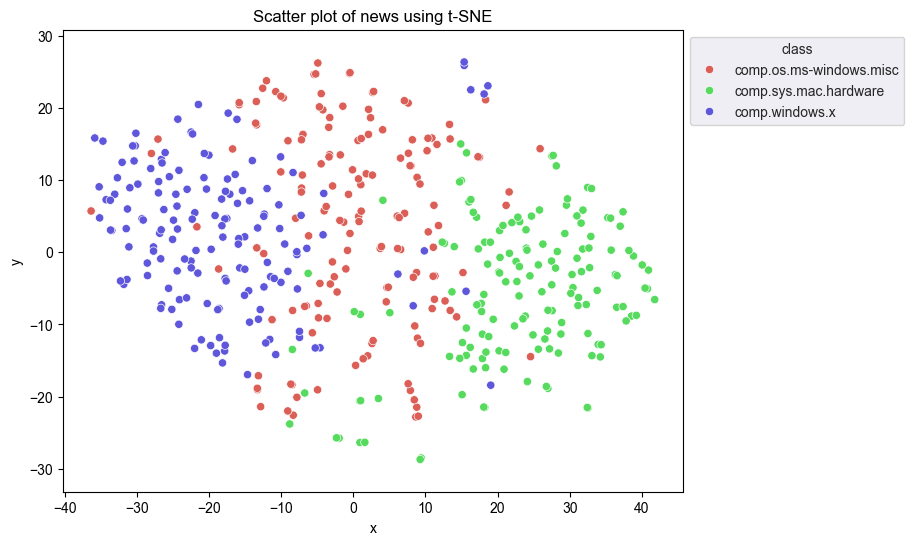

In [11]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})

# define scatter plot
sns.scatterplot(data=df_tsne, x='x', y='y', hue='class', palette='hls')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news using t-SNE');
plt.xlabel('x');
plt.ylabel('y');
plt.axis('equal')